In [1]:
#Import Important Libraries
import pandas as pd
import numpy as np

#Load the dataset
dev_data = pd.read_csv('Dev_data_to_be_shared.csv')
validation_data = pd.read_csv('validation_data_to_be_shared.csv')

#Display the first few rows of the dev data
print("Dev data:")
print(dev_data.head())

#Display basic informatino about the dataset
print("\n Development Data Info: ")
dev_data.info()

#Check the size of dataset
print(f"\n dev data shape: {dev_data.shape}")
print(f"\n validation data shape: {validation_data.shape}")


Dev data:
   account_number  bad_flag  onus_attribute_1  transaction_attribute_1  \
0               1         0               NaN                      NaN   
1               2         0          221000.0                      0.0   
2               3         0           25000.0                      0.0   
3               4         0           86000.0                      0.0   
4               5         0          215000.0                      0.0   

   transaction_attribute_2  transaction_attribute_3  transaction_attribute_4  \
0                      NaN                      NaN                      NaN   
1                      0.0                      0.0                      0.0   
2                      0.0                      0.0                      0.0   
3                      0.0                      0.0                      0.0   
4                      0.0                      0.0                      0.0   

   transaction_attribute_5  transaction_attribute_6  transaction

In [2]:
#Check for missing values
print("\nMissing values in dev data: ")
print(dev_data.isnull().sum())

#Calculate the percentage of missing values
missing_percentage = (dev_data.isnull().sum() / len(dev_data)) * 100
print("\n Percentage of Missing values: ")
print(missing_percentage[missing_percentage > 0])


Missing values in dev data: 
account_number                 0
bad_flag                       0
onus_attribute_1           25231
transaction_attribute_1    25231
transaction_attribute_2    25231
                           ...  
onus_attribute_44          85196
onus_attribute_45          85196
onus_attribute_46          85196
onus_attribute_47          85196
onus_attribute_48          85196
Length: 1216, dtype: int64

 Percentage of Missing values: 
onus_attribute_1           26.063467
transaction_attribute_1    26.063467
transaction_attribute_2    26.063467
transaction_attribute_3    26.063467
transaction_attribute_4    26.063467
                             ...    
onus_attribute_44          88.006942
onus_attribute_45          88.006942
onus_attribute_46          88.006942
onus_attribute_47          88.006942
onus_attribute_48          88.006942
Length: 1185, dtype: float64



Distribution of bad_flag:
bad_flag
0    0.985827
1    0.014173
Name: proportion, dtype: float64


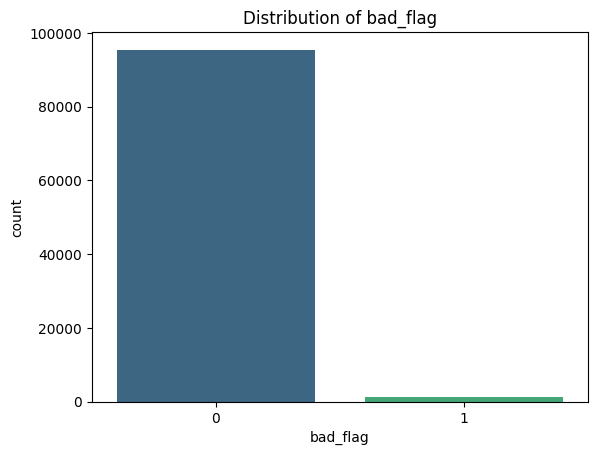

In [3]:
#Distribution of 'bad_flag'
import matplotlib.pyplot as plt
import seaborn as sns

print("\nDistribution of bad_flag:")
print(dev_data['bad_flag'].value_counts(normalize=True))

sns.countplot(data=dev_data, x='bad_flag', hue='bad_flag', palette='viridis', legend=False)
plt.title('Distribution of bad_flag')
plt.show()


 Summary Statistics:
       account_number      bad_flag  onus_attribute_1  \
count    96806.000000  96806.000000      7.157500e+04   
mean     48403.500000      0.014173      1.542391e+05   
std      27945.629417      0.118203      1.729925e+05   
min          1.000000      0.000000      2.500000e+04   
25%      24202.250000      0.000000      5.900000e+04   
50%      48403.500000      0.000000      1.000000e+05   
75%      72604.750000      0.000000      1.810000e+05   
max      96806.000000      1.000000      2.800000e+06   

       transaction_attribute_1  transaction_attribute_2  \
count             71575.000000             71575.000000   
mean                  9.570769                 0.002207   
std                1513.967595                 0.119240   
min                   0.000000                 0.000000   
25%                   0.000000                 0.000000   
50%                   0.000000                 0.000000   
75%                   0.000000                 0.00

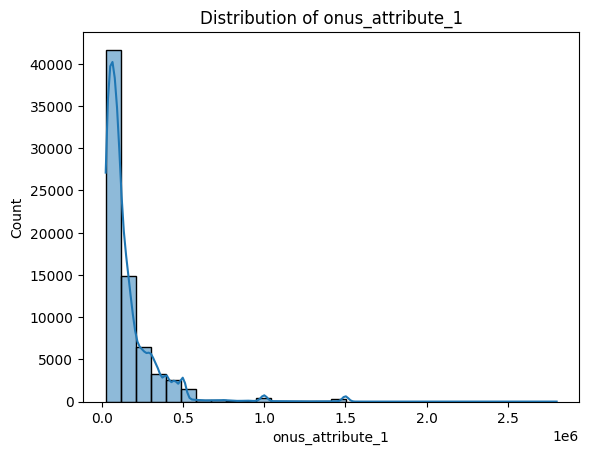

In [4]:
#Summary stats of all features
print("\n Summary Statistics:")
print(dev_data.describe())

#Check a sample of each feature group
onus_features = [col for col in dev_data.columns if col.startswith('onus')]
transaction_features = [col for col in dev_data.columns if col.startswith('transaction')]
bureau_features = [col for col in dev_data.columns if col.startswith('bureau')]
bureau_enquiry_features = [col for col in dev_data.columns if col.startswith('bureau_enquiry')]

print("\nOn-us Attributes:", onus_features)
print("\nTransaction Attributes:", transaction_features)
print("\nBureau Attributes:", bureau_features)
print("\nBureau Enquiry Attributes:", bureau_enquiry_features)

# Example: Distribution of credit limit (onus feature)
sns.histplot(dev_data[onus_features[0]], bins=30, kde=True)
plt.title(f"Distribution of {onus_features[0]}")
plt.show()

In [5]:
# Drop columns with >30% missing
threshold = 30
columns_to_drop = missing_percentage[missing_percentage > threshold].index
dev_data_cleaned = dev_data.drop(columns=columns_to_drop)

# Fill missing values in numeric columns with median
numeric_columns = dev_data_cleaned.select_dtypes(include=[np.number]).columns
dev_data_cleaned[numeric_columns] = dev_data_cleaned[numeric_columns].fillna(dev_data_cleaned[numeric_columns].median())

# Fill missing values in categorical columns with mode or placeholder for all-NaN columns
categorical_columns = dev_data_cleaned.select_dtypes(include=['object']).columns
for col in categorical_columns:
    if dev_data_cleaned[col].isnull().all():
        dev_data_cleaned[col] = "Unknown"  # Handle all-NaN categorical columns
    else:
        dev_data_cleaned[col] = dev_data_cleaned[col].fillna(dev_data_cleaned[col].mode().iloc[0])

print("\nMissing Values After Cleaning:")
print(dev_data_cleaned.isnull().sum().sum())  # Total missing values


Missing Values After Cleaning:
0


In [6]:
# Example of a new feature: transaction-to-credit ratio
if 'onus_attributes_credit_limit' in dev_data_cleaned.columns and 'transaction_attribute_total_transactions' in dev_data_cleaned.columns:
    dev_data_cleaned['transaction_to_credit_ratio'] = dev_data_cleaned['transaction_attribute_total_transactions'] / dev_data_cleaned['onus_attributes_credit_limit']

print("\nNew Feature Added: transaction_to_credit_ratio")


New Feature Added: transaction_to_credit_ratio


In [7]:
from sklearn.preprocessing import MinMaxScaler

# Normalize all numeric columns
scaler = MinMaxScaler()
dev_data_cleaned[numeric_columns] = scaler.fit_transform(dev_data_cleaned[numeric_columns])

print("\nSample of Normalized Data:")
print(dev_data_cleaned.head())


Sample of Normalized Data:
   account_number  bad_flag  onus_attribute_1  transaction_attribute_1  \
0        0.000000       0.0          0.027027                      0.0   
1        0.000010       0.0          0.070631                      0.0   
2        0.000021       0.0          0.000000                      0.0   
3        0.000031       0.0          0.021982                      0.0   
4        0.000041       0.0          0.068468                      0.0   

   transaction_attribute_2  transaction_attribute_3  transaction_attribute_4  \
0                      0.0                      0.0                 0.234223   
1                      0.0                      0.0                 0.234223   
2                      0.0                      0.0                 0.234223   
3                      0.0                      0.0                 0.234223   
4                      0.0                      0.0                 0.234223   

   transaction_attribute_5  transaction_attrib

Model Development

In [8]:
from sklearn.model_selection import train_test_split

# Define the target variable (y) and features (X)
X = dev_data_cleaned.drop(columns=['bad_flag', 'account_number'])  # Drop target and primary key
y = dev_data_cleaned['bad_flag']

# Split the data: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training Set: {X_train.shape}, {y_train.shape}")
print(f"Testing Set: {X_test.shape}, {y_test.shape}")

Training Set: (77444, 1189), (77444,)
Testing Set: (19362, 1189), (19362,)


In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix

# Train a logistic regression model
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("AUC-ROC Score:", roc_auc_score(y_test, y_pred_proba))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9859518644768103
AUC-ROC Score: 0.8441689202831604

Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99     19088
         1.0       0.75      0.01      0.02       274

    accuracy                           0.99     19362
   macro avg       0.87      0.51      0.51     19362
weighted avg       0.98      0.99      0.98     19362



Handle Class Imbalance Using SMOTE(Synthetic Minority Oversampling Technique) this creates samples for the minority class(defaulters) to balance the dataset

In [10]:
pip install imbalanced-learn

In [11]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix

# Separate features and target
X = dev_data_cleaned.drop(columns=['bad_flag', 'account_number'])  # Drop target and primary key
y = dev_data_cleaned['bad_flag']

# Split into training and testing sets (same as before)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE on the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Check the class distribution after SMOTE
print("Class Distribution Before SMOTE:")
print(y_train.value_counts())

print("\nClass Distribution After SMOTE:")
print(pd.Series(y_train_smote).value_counts())

# Train a logistic regression model on the balanced data
smote_model = LogisticRegression(max_iter=1000, random_state=42)
smote_model.fit(X_train_smote, y_train_smote)

# Make predictions on the test set
y_pred_smote = smote_model.predict(X_test)
y_pred_proba_smote = smote_model.predict_proba(X_test)[:, 1]

# Evaluate the model
print("\nAccuracy After SMOTE:", accuracy_score(y_test, y_pred_smote))
print("AUC-ROC Score After SMOTE:", roc_auc_score(y_test, y_pred_proba_smote))
print("\nClassification Report After SMOTE:")
print(classification_report(y_test, y_pred_smote))


Class Distribution Before SMOTE:
bad_flag
0.0    76346
1.0     1098
Name: count, dtype: int64

Class Distribution After SMOTE:
bad_flag
0.0    76346
1.0    76346
Name: count, dtype: int64

Accuracy After SMOTE: 0.7852494577006508
AUC-ROC Score After SMOTE: 0.8054578945919322

Classification Report After SMOTE:
              precision    recall  f1-score   support

         0.0       0.99      0.79      0.88     19088
         1.0       0.04      0.69      0.08       274

    accuracy                           0.79     19362
   macro avg       0.52      0.74      0.48     19362
weighted avg       0.98      0.79      0.87     19362



Average Precision Score: 0.0652


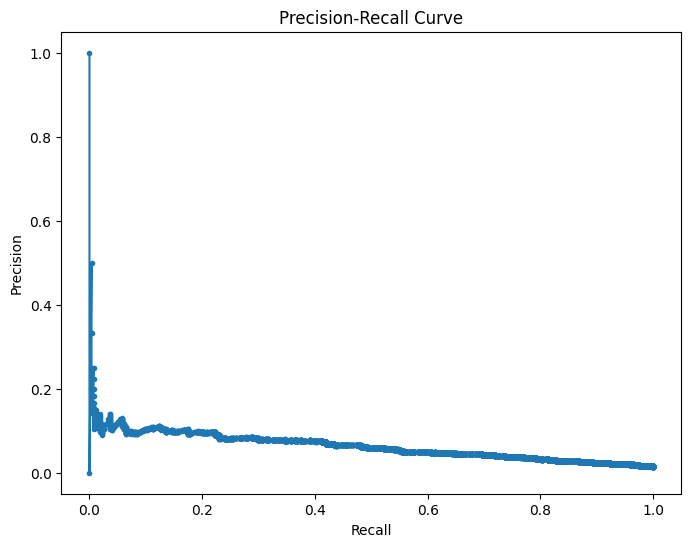


Performance at threshold 0.4:
Precision: 0.0365, Recall: 0.7628
F1-Score: 0.0697


In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score

# Define a function to evaluate the model at different thresholds
def evaluate_threshold(y_true, y_probs, threshold):
    y_pred = (y_probs >= threshold).astype(int)
    return classification_report(y_true, y_pred, output_dict=True)

# Get Precision-Recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba_smote)

# Calculate Average Precision Score
avg_precision = average_precision_score(y_test, y_pred_proba_smote)
print(f"Average Precision Score: {avg_precision:.4f}")

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

# Evaluate performance at different thresholds
threshold_performance = {}
for threshold in np.arange(0.1, 1.0, 0.05):  # Testing thresholds from 0.1 to 0.95
    rounded_threshold = round(threshold, 2)  # Round threshold to 2 decimal places
    performance = evaluate_threshold(y_test, y_pred_proba_smote, threshold)
    threshold_performance[rounded_threshold] = performance

# Print performance at the chosen threshold (rounding it to 2 decimals)
chosen_threshold = 0.4
rounded_chosen_threshold = round(chosen_threshold, 2)

print(f"\nPerformance at threshold {rounded_chosen_threshold}:")
chosen_performance = threshold_performance[rounded_chosen_threshold]
print(f"Precision: {chosen_performance['1.0']['precision']:.4f}, Recall: {chosen_performance['1.0']['recall']:.4f}")
print(f"F1-Score: {chosen_performance['1.0']['f1-score']:.4f}")

In [13]:
# Calculate F1-score at different thresholds excluding extreme values
thresholds_to_check = np.arange(0.1, 0.9, 0.05)  # Exploring thresholds from 0.1 to 0.9

f1_scores = []
for threshold in thresholds_to_check:
    y_pred = (y_pred_proba_smote >= threshold).astype(int)
    precision = np.sum((y_pred == 1) & (y_test == 1)) / np.sum(y_pred == 1) if np.sum(y_pred == 1) > 0 else 0
    recall = np.sum((y_pred == 1) & (y_test == 1)) / np.sum(y_test == 1) if np.sum(y_test == 1) > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    f1_scores.append(f1)

# Find the best threshold based on the maximum F1-score
best_threshold_idx = np.argmax(f1_scores)
best_threshold = thresholds_to_check[best_threshold_idx]

print(f"Best Threshold: {best_threshold:.4f}")
print(f"F1-Score at Best Threshold: {f1_scores[best_threshold_idx]:.4f}")

# Evaluate performance at the best threshold
y_pred_best = (y_pred_proba_smote >= best_threshold).astype(int)
print("\nClassification Report at Best Threshold:")
print(classification_report(y_test, y_pred_best))

Best Threshold: 0.8500
F1-Score at Best Threshold: 0.1288

Classification Report at Best Threshold:
              precision    recall  f1-score   support

         0.0       0.99      0.96      0.97     19088
         1.0       0.08      0.28      0.13       274

    accuracy                           0.95     19362
   macro avg       0.54      0.62      0.55     19362
weighted avg       0.98      0.95      0.96     19362



Key observations:
Precision for class 1.0 is very low (0.08), meaning that when the model predicts the positive class, it is often wrong.
Recall for class 1.0 is 0.28, meaning the model is correctly identifying some positive instances, but it’s still missing a large number of them.
The accuracy is 0.95, which is quite high, but this is largely due to the dominance of class 0.0 in the dataset.

Model Change to Random Forest

In [14]:
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score

# Separate features and target
X = dev_data_cleaned.drop(columns=['bad_flag', 'account_number'])  # Drop target and primary key
y = dev_data_cleaned['bad_flag']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE on the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Train a Random Forest model on the balanced data
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_smote, y_train_smote)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)
y_pred_proba_rf = rf_model.predict_proba(X_test)[:, 1]

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("AUC-ROC Score:", roc_auc_score(y_test, y_pred_proba_rf))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

Accuracy: 0.9857969218055986
AUC-ROC Score: 0.7924081740505748

Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99     19088
         1.0       0.00      0.00      0.00       274

    accuracy                           0.99     19362
   macro avg       0.49      0.50      0.50     19362
weighted avg       0.97      0.99      0.98     19362



Random Forest with Class Weights

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score

# Train Random Forest with class weights
rf_model_weighted = RandomForestClassifier(random_state=42, class_weight='balanced')
rf_model_weighted.fit(X_train, y_train)  # Use original data without SMOTE

# Make predictions
y_pred_rf_weighted = rf_model_weighted.predict(X_test)
y_pred_proba_rf_weighted = rf_model_weighted.predict_proba(X_test)[:, 1]

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred_rf_weighted))
print("AUC-ROC Score:", roc_auc_score(y_test, y_pred_proba_rf_weighted))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf_weighted))

Accuracy: 0.9858485693626692
AUC-ROC Score: 0.765449382345923

Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99     19088
         1.0       0.00      0.00      0.00       274

    accuracy                           0.99     19362
   macro avg       0.49      0.50      0.50     19362
weighted avg       0.97      0.99      0.98     19362



c:\Users\syama\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\syama\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\syama\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

Switch TO XGBoost: designed for better handling of class imbalance and feature importance

In [16]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [17]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score

# Define class weights
class_weights = {0: 1, 1: len(y) / (2 * y.value_counts()[1])}  # Adjust weight for minority class

# Train an XGBoost model
xgb_model = XGBClassifier(random_state=42, scale_pos_weight=class_weights[1])
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)
y_pred_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("AUC-ROC Score:", roc_auc_score(y_test, y_pred_proba_xgb))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb))

Accuracy: 0.9710257204834212
AUC-ROC Score: 0.7791414409481097

Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.98      0.99     19088
         1.0       0.10      0.13      0.11       274

    accuracy                           0.97     19362
   macro avg       0.54      0.56      0.55     19362
weighted avg       0.97      0.97      0.97     19362



In [19]:
from sklearn.model_selection import RandomizedSearchCV

random_search = RandomizedSearchCV(
    estimator=XGBClassifier(random_state=42),
    param_distributions=param_grid,
    scoring='roc_auc',
    cv=3,
    n_iter=10,  # Number of random combinations to try
    verbose=2,
    n_jobs=1  # Disable parallel processing
)

random_search.fit(X_train, y_train)
print("Best Parameters:", random_search.best_params_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END learning_rate=0.1, max_depth=7, n_estimators=300, scale_pos_weight=35.279154518950435, subsample=0.8; total time=  40.3s
[CV] END learning_rate=0.1, max_depth=7, n_estimators=300, scale_pos_weight=35.279154518950435, subsample=0.8; total time=  37.6s
[CV] END learning_rate=0.1, max_depth=7, n_estimators=300, scale_pos_weight=35.279154518950435, subsample=0.8; total time=  37.3s
[CV] END learning_rate=0.2, max_depth=3, n_estimators=300, scale_pos_weight=35.279154518950435, subsample=1.0; total time=  19.2s
[CV] END learning_rate=0.2, max_depth=3, n_estimators=300, scale_pos_weight=35.279154518950435, subsample=1.0; total time=  20.8s
[CV] END learning_rate=0.2, max_depth=3, n_estimators=300, scale_pos_weight=35.279154518950435, subsample=1.0; total time=  18.5s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=200, scale_pos_weight=35.279154518950435, subsample=1.0; total time=  17.4s
[CV] END learning_rate=0.01,

In [20]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score

# Train the XGBoost model with the best parameters
best_xgb_model = XGBClassifier(
    subsample=1.0,
    scale_pos_weight=35.28,
    n_estimators=200,
    max_depth=3,
    learning_rate=0.01,
    random_state=42
)
best_xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_best = best_xgb_model.predict(X_test)
y_pred_proba_best = best_xgb_model.predict_proba(X_test)[:, 1]

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred_best))
print("AUC-ROC Score:", roc_auc_score(y_test, y_pred_proba_best))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_best))


Accuracy: 0.8946906311331474
AUC-ROC Score: 0.8234642011490385

Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.90      0.94     19088
         1.0       0.06      0.45      0.11       274

    accuracy                           0.89     19362
   macro avg       0.53      0.67      0.53     19362
weighted avg       0.98      0.89      0.93     19362



In [23]:
threshold = 0.4  # Try a higher threshold
y_pred_adjusted_4 = (y_pred_proba_best >= threshold).astype(int)

# Evaluate with the new threshold
print("\nClassification Report at Threshold 0.4:")
print(classification_report(y_test, y_pred_adjusted_4))



Classification Report at Threshold 0.4:
              precision    recall  f1-score   support

         0.0       0.99      0.79      0.88     19088
         1.0       0.05      0.70      0.09       274

    accuracy                           0.79     19362
   macro avg       0.52      0.75      0.49     19362
weighted avg       0.98      0.79      0.87     19362



In [30]:
# Ensure the columns in validation data match the training data (excluding account_number)
X_val = validation_data.drop(columns=['account_number'])

# Align validation data columns with training data columns (only include common columns)
X_val = X_val[X_train.columns]  # Ensure that X_val contains the same features as X_train


In [31]:
# Get predicted probabilities for class 1 (defaulters) using the trained model
y_pred_proba_val = best_xgb_model.predict_proba(X_val)[:, 1]

# Create a DataFrame with account_number and predicted probabilities
validation_results = validation_data[['account_number']]
validation_results['predicted_probability'] = y_pred_proba_val

# Save the results to a CSV file
validation_results.to_csv('validation_predictions.csv', index=False)

# Output the first few rows to confirm
print(validation_results.head())


   account_number  predicted_probability
0          100001               0.489511
1          100002               0.314037
2          100003               0.351426
3          100004               0.187156
4          100005               0.357743


C:\Users\syama\AppData\Local\Temp\ipykernel_18960\3767070715.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation_results['predicted_probability'] = y_pred_proba_val


In [32]:
validation_results.sort_values(by='predicted_probability', ascending=False, inplace=True)
validation_results.to_csv('sorted_validation_predictions.csv', index=False)

C:\Users\syama\AppData\Local\Temp\ipykernel_18960\502579047.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation_results.sort_values(by='predicted_probability', ascending=False, inplace=True)
